# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Putri Nabilla
- **Email:** nabilaputri85355@gmail.com
- **ID Dicoding:**

## Menentukan Pertanyaan Bisnis

- Diantara musim semi dan musim gugur, dimusim apa penyewaan paling banyak?
- pada waktu kapan yang paling banyak melakukan registered?
- Apakah peminjaman sepeda lebih tinggi pada hari kerja dibandingkan
akhir pekan?



## Import Semua Packages/Library yang Digunakan

In [80]:
#memanggil semua library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [81]:
#Menampilkan 5 baris pertama pada data day.csv
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [82]:
#Memuat 5 baris pertama data hour.csv
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [83]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

Berdasarkan informasi output diatas, terdapat keanehan pada kedua data. dibagian column **dteday** memiliki tipe data **object**, yang seharusnya bertipe **datetime**. saya akan mengganti nya pada proses cleaning data


In [84]:
#Mengecek apakah ada Missing value pada dataset day_df
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [85]:
# Cek missing value dataset hour
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Ternyata setelah dicek, kedua data day_df dan hour_df tidak terdapat missing value. selanjutnya akan mengecek apakah ada data yang duplikat dari kedua data ini?

In [86]:
#cek duplikat data day_df
print("Jumlah duplikasi:", day_df.duplicated().sum())

Jumlah duplikasi: 0


In [88]:
#cek duplikasi data hour_df
print("Jumlah duplikasi:", hour_df.duplicated().sum())

Jumlah duplikasi: 0


ternyata setelah dicek, kedua data tersebut tidak memiliki nilai duplikat

In [89]:
#menampilkan ringkasan parameter statistik (mean, median, dll.) dari kolom numerik pada sebuah DataFrame.
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [90]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Pada data day dan hour terdapat column workingday yang artinya jika hari libur atau holiday ditandai dengan 1 sedangkan jika tidak ditandai 0 pernyataan ini sebenarnya sudah diwakili oleh weekday dan holiday yang mana weekday : hari kerja dalam satu minggu dan holiday : hari libur atau tidak libur. jadi, dalam hal ini dilakukannya dropping/ penghapusan pada kolom workingday


In [91]:
# Menghapus column workingday pada data day_df dan hour_df
day_df.drop("workingday", axis=1, inplace=True)
hour_df.drop("workingday", axis=1, inplace=True)

In [92]:
#menampilkan data yang sudah di drop
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [93]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,1,0.24,0.2879,0.75,0.0,0,1,1


seperti yang dilihat sudah tidak ada kolom workingday

selanjutnya akan melakukan penggantian nama kolom (rename), agar mudah untuk dibaca dan agar saya mudah untuk menganalisis nya. berikut keterangan kolom:
- dteday --> date_day
- season : (1:springer: semi, 2:summer: panas, 3:fall: gugur, 4:winter: dingin)
- yr --> year (0: 2011, 1:2012)
- mnth --> month ( 1 to 12)
- hr --> hour (0 to 23): jam 00.00-23.00
- holiday : weather day is holiday or not: hari libur atau tidak
- weekday --> day_of_week
- weathersit --> weather_sit :

1.   Clear, Few clouds, Partly cloudy, Partly cloudy (cuaca cerah ideal)
2.   Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (berkabut, cuaca kurang ideal)
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (hujan,kondisi cuaca buruk)
4. Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog (kondisi cuaca sangat buruk
- temp : suhu sebenarnya yang dinormalisasi dengan membaginya dengan 41.
- atemp : suhu yang dirasakan (feels-like temperature) yang dinormalisasi dengan membaginya dengan 50.
-hum --> humidity: kelembapan yang dinormalisasi dengan membaginya oleh 100
- windspeed : kecepatan angin yang dinormalisasi dengan membaginya oleh 67  
- Casual: Pengguna yang tidak terdaftar, biasanya menyewa sepeda untuk jangka pendek atau sekali-kali.
- Registered: Pengguna yang terdaftar lebih sering melakukan penyewaan sepeda
- cnt --> total_rental : jumlah total sepeda yang disewa mencakup casual dan registered




**Rename column**

In [94]:
#Rename kolom pada data day_df
day_df.rename(columns={
    "dteday": "date_day",
    "yr": "year",
    "mnth": "month",
    "weekday": "day_of_week",
    "weathersit": "weather_sit",
    "hum": "humidity",
    "cnt": "total_rental"
}, inplace=True)


In [95]:
#menampilkan data yang sudah di rename
day_df.head()

,instant,date_day,season,year,month,holiday,day_of_week,weather_sit,temp,atemp,humidity,windspeed,casual,registered,total_rental
0,1,2011-01-01,1,0,1,0,6,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [99]:
#Rename kolom pada data hour_df
hour_df.rename(columns={
    "dteday": "date_day",
    "yr": "year",
    "mnth": "month",
    "hr": "hour",
    "weekday": "day_of_week",
    "weathersit": "weather_sit",
    "hum": "humidity",
    "cnt": "total_rental"
}, inplace=True)

In [100]:
#menampilkan data yang sudah di rename kolom
hour_df.head()

,instant,date_day,season,year,month,hour,holiday,day_of_week,weather_sit,temp,atemp,humidity,windspeed,casual,registered,total_rental
0,1,2011-01-01,1,0,1,0,0,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,1,0.24,0.2879,0.75,0.0,0,1,1


In [101]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       731 non-null    int64  
 1   date_day      731 non-null    object 
 2   season        731 non-null    int64  
 3   year          731 non-null    int64  
 4   month         731 non-null    int64  
 5   holiday       731 non-null    int64  
 6   day_of_week   731 non-null    int64  
 7   weather_sit   731 non-null    int64  
 8   temp          731 non-null    float64
 9   atemp         731 non-null    float64
 10  humidity      731 non-null    float64
 11  windspeed     731 non-null    float64
 12  casual        731 non-null    int64  
 13  registered    731 non-null    int64  
 14  total_rental  731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 c

**Insight:**
- dari informasi data diatas, date_day masih bertipe object dan harus diubah menjadi datetime
-  pada kolom season, year, month, hour, day_of_week, wether_sit seharusnya dtype categorical bukan int jadi harus diubah

In [102]:
#Mengubah kolom date_day menjadi tipe datetime untuk kedua data
datetime_columns = ["date_day"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   date_day      731 non-null    datetime64[ns]
 2   season        731 non-null    int64         
 3   year          731 non-null    int64         
 4   month         731 non-null    int64         
 5   holiday       731 non-null    int64         
 6   day_of_week   731 non-null    int64         
 7   weather_sit   731 non-null    int64         
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  humidity      731 non-null    float64       
 11  windspeed     731 non-null    float64       
 12  casual        731 non-null    int64         
 13  registered    731 non-null    int64         
 14  total_rental  731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(

bisa dilihat, kolom date_day sudah berubah menjadi tipe data **datetime** yang sebelumnya **object**

In [103]:
#Mengubah kolom season,year,month,hour,day_of_week dan weather_sit menjadi bertipe category yang semula int
categorical_columns_day = ["season", "year", "month", "day_of_week", "weather_sit"]
categorical_columns_hour = ["season", "year", "month", "hour", "day_of_week", "weather_sit"] # tambahkan kolom hour

for column in categorical_columns_day:
   day_df[column] =  day_df[column].astype("category")
for column in categorical_columns_hour:
   hour_df[column] =  hour_df[column].astype("category")

day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   date_day      731 non-null    datetime64[ns]
 2   season        731 non-null    category      
 3   year          731 non-null    category      
 4   month         731 non-null    category      
 5   holiday       731 non-null    int64         
 6   day_of_week   731 non-null    category      
 7   weather_sit   731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  humidity      731 non-null    float64       
 11  windspeed     731 non-null    float64       
 12  casual        731 non-null    int64         
 13  registered    731 non-null    int64         
 14  total_rental  731 non-null    int64         
dtypes: category(5), datetime64[ns](1), float

bisa dilihat, pada kolom season,year,month,hour,day_of_week dan weather_sit sudah berubah menjadi dtype **category**

**Melakukan Penjabaran nilai data** sesuai dengan keterangan kolom pada kedua data  

**Menjabarkan atau mengubah nilai kolom season, year, month, day_of_week, weather_sit agar mudah dipahami**

In [105]:
# mengubah nilai season menjadi deskripsi musim agar mudah dipahami 1:Spring, 2:Summer, 3:Fall, 4:Winter
column_season = {
    1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"
}
day_df["season"]= day_df["season"].replace(column_season)
hour_df["season"]= hour_df["season"].replace(column_season)

#menjabarkan nilai kolom year 0: 2011, 1:2012
column_year = {
    0: 2011,
    1: 2012
}
day_df["year"]= day_df["year"].replace(column_year)
hour_df["year"]= hour_df["year"].replace(column_year)

#menjabarkan  nilai kolom month menjadi 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
column_month = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}
day_df["month"]= day_df["month"].replace(column_month)
hour_df["month"]= hour_df["month"].replace(column_month)

#menjabarkan nilai kolom day_of_week menjadi  0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
column_day_of_week = {
    0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"
}
day_df["day_of_week"]= day_df["day_of_week"].replace(column_day_of_week)
hour_df["day_of_week"]= hour_df["day_of_week"].replace(column_day_of_week)

#Menjabarkan nilai kolom weather_sit menjadi 1: Clear, 2:Mist, 3:Light rain, 4: Heavy Rain
column_weather_sit = {
    1: "Clear", 2: "Mist", 3: "Light rain", 4: "Heavy Rain"
}
day_df["weather_sit"]= day_df["weather_sit"].replace(column_weather_sit)
hour_df["weather_sit"]= hour_df["weather_sit"].replace(column_weather_sit)

#mengecek perubahan
day_df.head()

,instant,date_day,season,year,month,holiday,day_of_week,weather_sit,temp,atemp,humidity,windspeed,casual,registered,total_rental
0,1,2011-01-01,Spring,2011,Jan,0,Sat,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [106]:
#cek perubahan
hour_df.head()

,instant,date_day,season,year,month,hour,holiday,day_of_week,weather_sit,temp,atemp,humidity,windspeed,casual,registered,total_rental
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Membuat kolom baru dengan nama category_day**

In [107]:
#membuat kolom baru bernama category_day untuk mengkategorikan weeday dan weekend
def category_day(day_of_week):
  if day_of_week <= "Thu":
    return "weekday"
  else:
    return "weekend"
day_df["category_day"] = day_df["day_of_week"].apply(category_day)
hour_df["category_day"] = hour_df["day_of_week"].apply(category_day)
print(day_df.head())
print(hour_df.head())

   instant   date_day  season  year month  holiday day_of_week weather_sit  \
0        1 2011-01-01  Spring  2011   Jan        0         Sat        Mist   
1        2 2011-01-02  Spring  2011   Jan        0         Sun        Mist   
2        3 2011-01-03  Spring  2011   Jan        0         Mon       Clear   
3        4 2011-01-04  Spring  2011   Jan        0         Tue       Clear   
4        5 2011-01-05  Spring  2011   Jan        0         Wed       Clear   

       temp     atemp  humidity  windspeed  casual  registered  total_rental  \
0  0.344167  0.363625  0.805833   0.160446     331         654           985   
1  0.363478  0.353739  0.696087   0.248539     131         670           801   
2  0.196364  0.189405  0.437273   0.248309     120        1229          1349   
3  0.200000  0.212122  0.590435   0.160296     108        1454          1562   
4  0.226957  0.229270  0.436957   0.186900      82        1518          1600   

  category_day  
0      weekday  
1      weekday  

In [108]:
#Mengecek apakah kolom category_day sudah benar dibuat
day_df.head()

,instant,date_day,season,year,month,holiday,day_of_week,weather_sit,temp,atemp,humidity,windspeed,casual,registered,total_rental,category_day
0,1,2011-01-01,Spring,2011,Jan,0,Sat,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985,weekday
1,2,2011-01-02,Spring,2011,Jan,0,Sun,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801,weekday
2,3,2011-01-03,Spring,2011,Jan,0,Mon,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,weekday
3,4,2011-01-04,Spring,2011,Jan,0,Tue,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,weekend
4,5,2011-01-05,Spring,2011,Jan,0,Wed,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,weekend


bisa dilihat hasilnya sudah dibuatkan kolom baru bernama category_day

## Exploratory Data Analysis (EDA)

### Explore data day_df

In [109]:
#melihat rangkuman parameter statistik dari data day_df
day_df.describe(include="all")

,instant,date_day,season,year,month,holiday,day_of_week,weather_sit,temp,atemp,humidity,windspeed,casual,registered,total_rental,category_day
count,731.000000,731,731,731.0,731,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,NaN,4,2.0,12,NaN,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Fall,2012.0,Jan,NaN,Sun,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekday
freq,NaN,NaN,188,366.0,62,NaN,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,523
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.028728,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,1.000000,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


**Insight:**
- dilihat dari rangkuman parameter statistik, kita memiliki pelanggan yang menyewa sebanyak 731.000000 dengan top month bulan jan(january)
- pada kolom holiday max 1 dengan standar deviasi 0,167155

In [110]:
#melihat jumlah total_rental berdasarkan season
day_df.groupby(by="season").total_rental.sum().sort_values(ascending=False)

<ipython-input-110-47e37b901c8c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").total_rental.sum().sort_values(ascending=False)


,total_rental
season,
Fall,1061129
Summer,918589
Winter,841613
Spring,471348


berdasarkan tabel, total rental yang paling tinggi adalah pada musim fall(gugur) sebanyak 1061129 dan yang paling rendah ada di season spring (semi) dengan pelanggan sebanyak 471348

In [111]:
#Melihat demografi pelanggan berdasarkan season dengan nilai max min setiap casual dan registered
day_df.groupby(by="season").agg({
    "total_rental": "sum",
    "casual": ["min", "max"],
    "registered": ["min", "max"]
})

<ipython-input-111-1e1d141e86f5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").agg({


total_rental casual       registered      
                sum    min   max        min   max
season                                           
Spring       471348      9  3155        416  5315
Summer       918589    120  3410        674  6456
Fall        1061129    118  3160        889  6917
Winter       841613      2  3031         20  6946

berdasarkan tabel diatas, season fall menduduki tingkat tertinggi dari total_rental diantara yang lain sebanyak 1061129 dengan nilai casual penyewaan dalam jangka pendek paling rendah biasa nya min 118 dan max dan nilai max 3160 dan jumlah yag registered atau sering mendaftar untuk sewal dengan nilai min 889 dan max 6917.   

In [112]:
# melihat penyebaran pelanggan berdasarkan season jumlah seluruh nya dengan nilai seluruh casual dan registered
day_df.groupby(by="season").agg({
    "casual": ["sum"],
    "registered": ["sum"]
})

<ipython-input-112-fb6d4473ffd4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").agg({


,casual,registered
,sum,sum
season,,
Spring,60622,410726
Summer,203522,715067
Fall,226091,835038
Winter,129782,711831


berdasarkan tabel diatas, pelanggan yang menyewa secara casual atau penyewaan jangka pendek tidak telalu sering menyewa yang paling tinggi adalah di season fall dengan angka 226091 dan registered 835038

In [113]:
#melihat seberapa banyak jumlah penyewa berdasarkan musim semi dan musim gugur
#filter data hanya untuk musim semi dan musim gugur berdasarkan total jumlah penyewa/ rental (Total_rental)
df_filtered = day_df.loc[day_df["season"].isin(["Spring", "Fall"]), 'total_rental'].groupby(day_df['season']).sum()
# menampilkan hasil
print(df_filtered)

season
Spring     471348
Summer          0
Fall      1061129
Winter          0
Name: total_rental, dtype: int64


<ipython-input-113-fa6eba2ccad4>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered = day_df.loc[day_df["season"].isin(["Spring", "Fall"]), 'total_rental'].groupby(day_df['season']).sum()


ternyata yang paling banyak melakukan sewa sepeda diantara musim semi dan gugur, yang paling tinggi adalah pada musim gugur(fall) sebanyak 1061129 sedangkan musim semi(spring) menyentuh angka 471348  

### Explore data hour_df

In [114]:
#melihat rangkuman parameter statistik dari data hour_df
hour_df.describe(include="all")

,instant,date_day,season,year,month,hour,holiday,day_of_week,weather_sit,temp,atemp,humidity,windspeed,casual,registered,total_rental,category_day
count,17379.0000,17379,17379,17379.0,17379,17379.0,17379.000000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,4,2.0,12,24.0,NaN,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Fall,2012.0,May,17.0,NaN,Sat,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekday
freq,NaN,NaN,4496,8734.0,1488,730.0,NaN,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12451
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,0.028770,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN


berdasarkan data tersebut, kita memiliki pelanggan yang menyewa sebanyak 17379 orang dengan top year nya ada di tahun 2012 dengan freq 8734, top month may dan top hour 17.00 dan sebagainya

In [115]:
# melihat penyebaran pelanggan yang melakukan registered berdasarkan hour
hour_df.groupby(by="hour").registered.sum().sort_values(ascending=False)

<ipython-input-115-b21d241adc1b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="hour").registered.sum().sort_values(ascending=False)


,registered
hour,
17,282640
18,265276
8,245240
19,191284
16,173914
7,146134
20,138172
9,136980
12,134696


berdasarkan tabel, pelanggan yang paling banyak melakukan sewa sepeda atau registered adalah pada **jam 17.00** sebanyak **282640** orang dan dijam **04.00** sedikit yang melakukan penyewaan sepeda yaitu dengan angka **3554** orang.

In [116]:
#melihat perbandingan jumlah rental sepeda berdasarkan kategori hari weekday dan weekend
hour_df.groupby(by="category_day").total_rental.sum().sort_values(ascending=False)

,total_rental
category_day,
weekday,2350522
weekend,942157


seperti yang terlihat, pelanggan yang melakukan sewa sepeda lebih banyak pada kategori weekday dengan angka 2350522 dibanding dengan weekend yang menyentuh angka 942157

In [117]:
#melihat persebaran pelanggan yang menyewa sepeda dengan kategori weekday dan weekend berdasarkan total rental keseluruhan, registered dan casual
day_df.groupby(by="category_day").agg({
    "total_rental": "sum",
    "registered": "sum",
    "casual": "sum"
})

,total_rental,registered,casual
category_day,,,
weekday,2350522,1845667,504855
weekend,942157,826995,115162


## Visualization & Explanatory Analysis

### Pertanyaan 1: Diantara musim semi dan musim gugur, dimusim apa penyewaan paling banyak?

<ipython-input-119-9fe20ac7c243>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["season"] = pd.Categorical(filtered_df["season"], categories=["Fall", "Spring"], ordered=True)
<ipython-input-119-9fe20ac7c243>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="total_rental", data=filtered_df.sort_values(by="season"), palette=colors)
<ipython-input-119-9fe20ac7c243>:17: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="season", y="total_rental", data=filtered_df.sort_values(by="sea

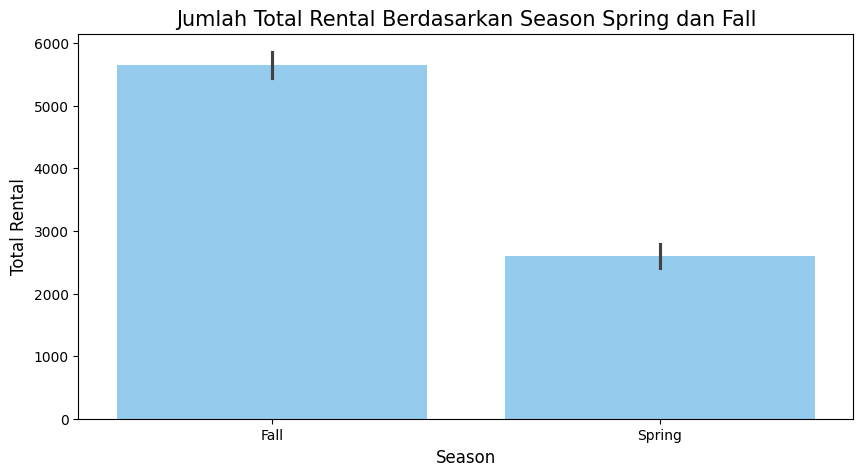

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Memfilter data untuk musim Spring dan Fall saja
filtered_df = day_df[day_df['season'].isin(["Spring", "Fall"])]

# Mengatur urutan manual agar Spring muncul pertama
filtered_df["season"] = pd.Categorical(filtered_df["season"], categories=["Fall", "Spring"], ordered=True)

# Membuat warna hanya untuk Spring dan Fall
colors = ['lightskyblue']

# Membuat grafik bar
plt.figure(figsize=(10, 5))

# Plot bar chart dengan urutan yang sudah diatur
sns.barplot(x="season", y="total_rental", data=filtered_df.sort_values(by="season"), palette=colors)

# Menambahkan judul dan label
plt.title("Jumlah Total Rental Berdasarkan Season Spring dan Fall", fontsize=15)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Total Rental", fontsize=12)

# Menampilkan plot
plt.show()


berdasarkan visualisasi diatas, musim fall adalah yang terbanyak dibanding musim spring

<ipython-input-120-d4311ea5b02b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_rentals = day_df.groupby(by="season").total_rental.sum().reset_index()
<ipython-input-120-d4311ea5b02b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="total_rental", data=season_rentals, palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/s

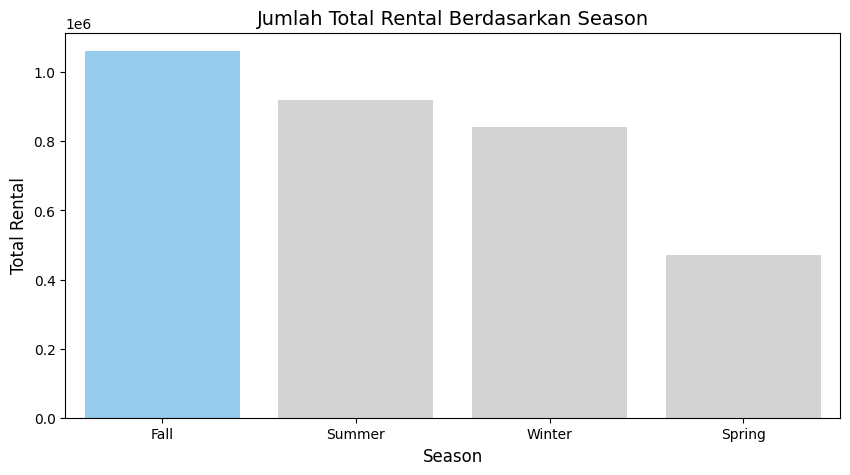

In [120]:
# Menghitung total_rental berdasarkan season
season_rentals = day_df.groupby(by="season").total_rental.sum().reset_index()

# Mengatur urutan season dengan Fall pertama, Summer kedua, Winter ketiga, dan Spring terakhir
season_rentals["season"] = pd.Categorical(season_rentals["season"],
                                          categories=["Fall", "Summer", "Winter", "Spring"],
                                          ordered=True)

# Membuat warna untuk setiap season, dengan warna khusus untuk Fall
colors = ['lightskyblue', 'lightgray', 'lightgray', 'lightgray']

# Membuat grafik bar
plt.figure(figsize=(10, 5))
sns.barplot(x="season", y="total_rental", data=season_rentals, palette=colors)

# Menambahkan judul dan label
plt.title("Jumlah Total Rental Berdasarkan Season", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Total Rental", fontsize=12)

# Menampilkan plot
plt.show()

### Pertanyaan 2: Pada waktu kapan yang paling banyak melakukan registered?

<ipython-input-127-7603edf5a1fa>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_registered = hour_df.groupby('hour')['registered'].sum().reset_index()
<ipython-input-127-7603edf5a1fa>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour", y="registered", data=hour_registered, palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seabor

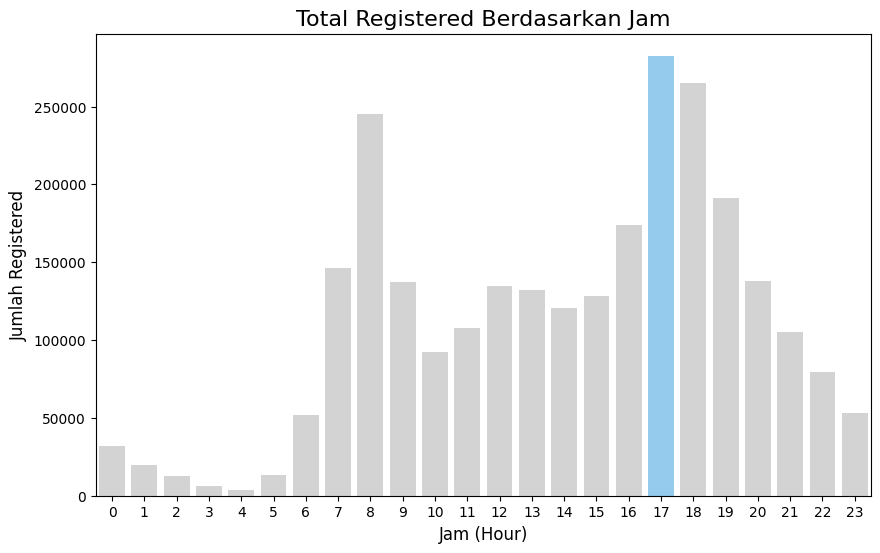

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengelompokkan data berdasarkan 'hour' dan menghitung total 'registered'
hour_registered = hour_df.groupby('hour')['registered'].sum().reset_index()

#membuat colors khusus untuk jam 17 diwarna lightskyblue yang artinya jam paling banyak registered
#sedangkan yang lainnya berwarna abu-abu
colors = ['lightskyblue'if hour == 17  else 'lightgray' for hour in hour_registered['hour']]

# Membuat grafik bar
plt.figure(figsize=(10, 6))
sns.barplot(x="hour", y="registered", data=hour_registered, palette=colors)

# Menambahkan judul dan label
plt.title("Total Registered Berdasarkan Jam", fontsize=16)
plt.xlabel("Jam (Hour)", fontsize=12)
plt.ylabel("Jumlah Registered", fontsize=12)

# Menampilkan plot
plt.show()


**Insight:**
- pelanggan banyak melakukan registered rental sepeda pada jam 17.00

### Pertanyaan 3: Apakah peminjaman sepeda lebih tinggi pada hari kerja dibanding dengan akhir pekan?

In [123]:
#melihat banyaknya penyewa berdasarkan kategori hari
hour_df.groupby(by="category_day").total_rental.sum().sort_values(ascending=False)

,total_rental
category_day,
weekday,2350522
weekend,942157


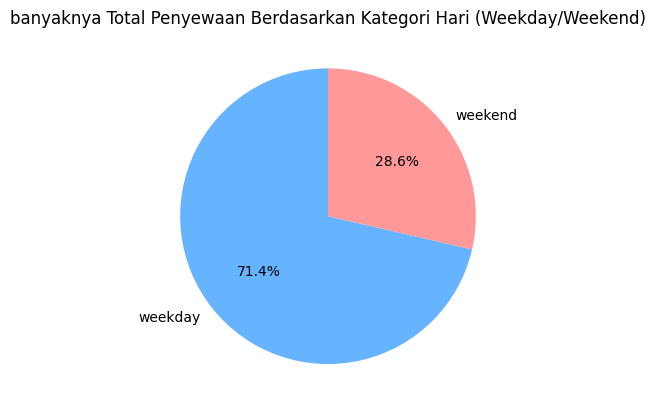

In [124]:
import matplotlib.pyplot as plt
# Menghitung total rental berdasarkan kategori hari
category_rental = day_df.groupby('category_day')['total_rental'].sum().reset_index()

# Membuat pie chart
plt.pie(category_rental['total_rental'], labels=category_rental['category_day'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('banyaknya Total Penyewaan Berdasarkan Kategori Hari (Weekday/Weekend)')
plt.show()

## Analisis Lanjutan (Opsional)

In [125]:
#menghitung rfm
date = max(hour_df["date_day"])
rfm_df = hour_df.groupby(by="total_rental").agg({
    "date_day": lambda x: (date - x.max()).days, #recency
    "hour": "count", #frequency
    "total_rental": "sum" #monetary
})
rfm_df.columns = ["recency", "frequency", "monetary"]
rfm_df

,recency,frequency,monetary
total_rental,,,
1,0,158,158
2,1,208,416
3,0,224,672
4,3,231,924
5,3,260,1300
...,...,...,...
967,97,1,967
968,112,1,968
970,111,1,970


In [126]:
# menyimpan dataframe yang sudah bersih ke dalam file CSV
day_df.to_csv('day_bersih.csv', index=False)
hour_df.to_csv('hour_bersih.csv', index=False)

## Conclusion

- Diantara musim semi(spring) dan musim gugur yang paling banyak melakukan penyewaan adalah pada musim gugur(fall)
- waktu yang paling banyak melakukan registered adalah pada jam 17.00
- ya benar, peminjaman sepeda paling tinggi adalah pada kategori weekdays atau hari kerja   